# ASR Tutorial Week 1: FSTs and language as graphs
This week our goal is to understand and get some practice with representing language as a graph. We'll be using the `pynini` library to create and interact with Finite State Transducers (FSTs), a graph model frequently used for natural language.

In this exercise, we'll practice using FSTs to map between words and phonemes. For ease of typing phonemes are represented using [Arpabet](https://en.wikipedia.org/wiki/ARPABET) rather than IPA.

In [312]:
import pynini
import graphviz
from typing import *

First let's get some basics on how FSTs work.

Now let's move on to FSTs with natural language. We first need to define a dictionary that stores words and their associated phonemes. We'll use this to construct various FSTs throughout the tutorial.

In [ ]:
lexicon = {
    "she": ["sh", "iy"],
    "sells": ["s", "eh", "l", "z"],
    "seashells": ["s", "iy", "sh", "eh", "l", "z"],
    "by": ["b", "ay"],
    "the": ["dh", "ax"],
    "seashore": ["s", "iy", "sh", "aw", "r"]
}

words = set()
phones = set()

for word, phone_list in lexicon.items():
    words.add(word)
    phones.update(phone_list)
words, phones

({'by', 'seashells', 'seashore', 'sells', 'she', 'the'},
 {'aw', 'ax', 'ay', 'b', 'dh', 'ee', 'eh', 'l', 'r', 's', 'sh', 'z'})

In [314]:
symbols = pynini.SymbolTable()
symbols.add_symbol('<eps>')

for word in words:
    symbols.add_symbol(word)

for phone in phones:
    symbols.add_symbol(phone)

def set_symbols(f: pynini.Fst) -> pynini.Fst:
    """
    Set input and output symbols for a FST `f` to the
    user-defined symbol table.
    """
    f=f.set_input_symbols(symbols)
    f=f.set_output_symbols(symbols)
    return f

def fsa(acceptor_str: Union[str, List[str]], weight: Optional[pynini.WeightLike]=None) -> pynini.Fst:
    """
    Create a Finite State Acceptor of the given string using
    the symbols table.
    """
    if type(acceptor_str) is list:
        acceptor_str = ' '.join(acceptor_str)
    f=pynini.accep(acceptor_str, weight=weight, token_type=symbols)
    f=set_symbols(f)
    f=f.optimize()
    return f


In [315]:
def print_fst(f):
    tmp_path = 'tmp.dot'
    f=set_symbols(f)
    f.draw(tmp_path, portrait=True)
    with open(tmp_path) as file:
        return graphviz.Source(file.read())
    
def fst_string(f):
    return f.string(token_type=symbols)

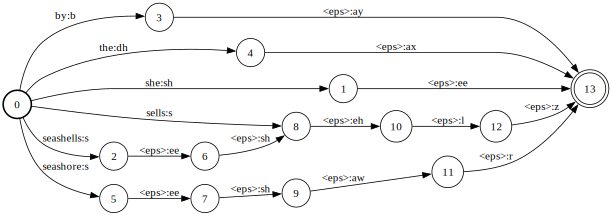

In [316]:
word2phones=pynini.union(*[
    pynini.cross(fsa(key), fsa(' '.join(val)))
    for key, val in lexicon.items()
])
word2phones=word2phones.optimize()
print_fst(word2phones)

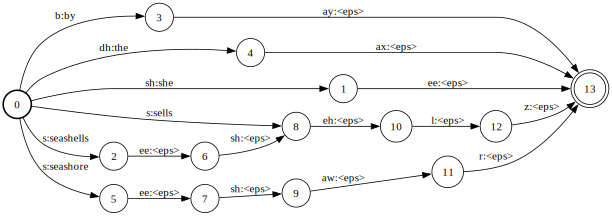

In [317]:
phones2word = pynini.invert(word2phones)
print_fst(phones2word)

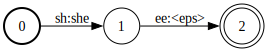

In [ ]:
f=fsa("sh iy")@phones2word
print_fst(f)

In [320]:
f=fsa("sells")@word2phones